In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
import pymysql
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="************************************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
df = pd.DataFrame(cur.fetchall())
df["date_time"] = pd.to_datetime(df["date_time"])
cur.close()
connection.close()
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0


In [121]:
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day
def get_season(season):
    _sea = {12: "Winter", 1: "Winter", 2: "Winter", 
              3: "Spring", 4: "Spring", 5: "Spring", 
              6: "Summer", 7: "Summer", 8: "Summer", 
              9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return _sea.get(season)
df["season"] = df["month"].map(get_season)
df["weekday_name"] = df["date_time"].dt.day_name()
new_df = df.copy()
group_year = new_df.groupby(["year"])
group_month = new_df.groupby(["month"])
group_season = new_df.groupby(["season"])
group_year_month = new_df.groupby(["year", "month"])
group_year_season = new_df.groupby(["year", "season"])
group_season_weekday = new_df.groupby(["season", "weekday_name"])
years = [i for i in range(2020, 2025)]
months = [i for i in range(1, 13)]
seasons = ["Spring", "Summer", "Autumn", "Winter"]
air = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
weather = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity']
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,year,month,day,season,weekday_name
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,2020,1,1,Winter,Wednesday
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,2020,1,2,Winter,Thursday
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,2020,1,3,Winter,Friday
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,2020,1,4,Winter,Saturday
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,2020,1,5,Winter,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,2024,9,19,Autumn,Thursday
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,2024,9,20,Autumn,Friday
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,2024,9,21,Autumn,Saturday
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,2024,9,22,Autumn,Sunday


In [4]:
df.columns

Index(['date_time', 'totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph',
       'pressure_in', 'humidity', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co',
       'year', 'month', 'day', 'season', 'weekday_name'],
      dtype='object')

In [5]:
cols = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
df[cols].describe()

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,7.433079,9.166030,25.028704,9.223542,29.823044,80.009838,36.372704,20.649026,51.346262,10.600116,13.186921,3.219956
std,24.328345,1.246316,4.647078,3.707362,0.187886,10.125982,27.204867,16.506355,88.280234,5.074927,8.286860,2.348592
min,0.000000,1.000000,11.200000,2.390000,29.410000,36.000000,0.874000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,0.000000,8.700000,21.500000,6.690000,29.660000,73.000000,17.000000,11.000000,19.000000,10.000000,8.000000,2.000000
50%,0.735000,9.800000,25.600000,8.180000,29.800000,83.000000,28.000000,17.000000,26.000000,11.000000,13.000000,3.000000
75%,5.025000,10.000000,28.800000,10.762500,29.970000,88.000000,46.000000,27.000000,39.000000,15.000000,13.000000,4.000000
max,506.710000,10.000000,35.400000,32.930000,30.350000,97.000000,272.688000,391.552000,500.000000,23.000000,48.000000,29.000000


### Summary Statistics

In [59]:
df['pm2_5'].describe()

count    1728.000000
mean       36.372704
std        27.204867
min         0.874000
25%        17.000000
50%        28.000000
75%        46.000000
max       272.688000
Name: pm2_5, dtype: float64

### Overall Average

In [60]:
mean = df['pm2_5'].mean()
print(f'The mean value for PM2.5 is {mean}')

The mean value for PM2.5 is 36.37270431706086


### Distribution of Values

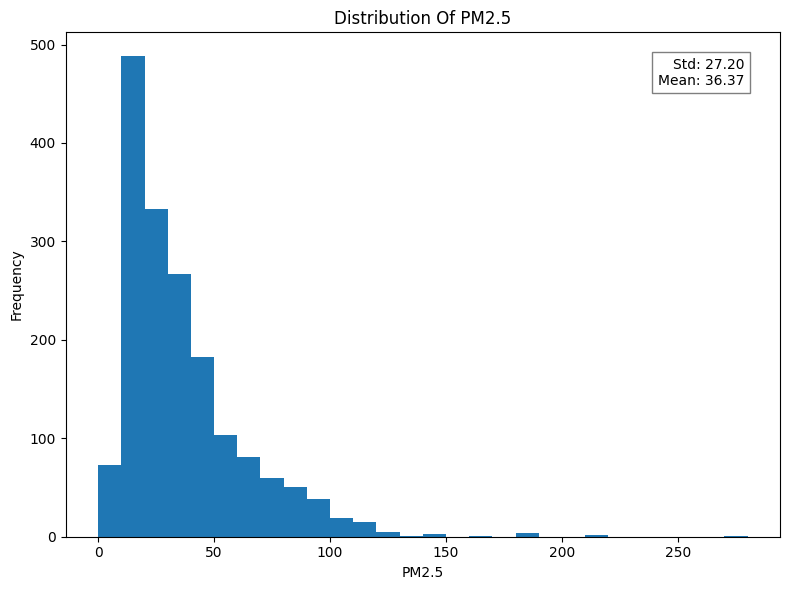

In [63]:
fig, axs = plt.subplots(figsize=(8, 6))
std = df['pm2_5'].std()  
mean = df['pm2_5'].mean() 

bins=np.arange(0,df['pm2_5'].max()+10,10)
axs.hist(df['pm2_5'], bins=bins)
axs.set_xlabel('PM2.5')
axs.set_ylabel("Frequency")
axs.set_title(f"Distribution Of PM2.5")

axs.text(0.95, 0.95, f"Std: {std:.2f}\nMean: {mean:.2f}", 
         transform=axs.transAxes, ha="right", va="top", 
         bbox=dict(facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

Observation: PM2.5 concentration values are primarily concentrated between 0 and 50, indicating that low concentrations are quite common. The distribution is right-skewed, with a few outlier values.

### Seasonal Distribution 

<Figure size 1500x700 with 0 Axes>

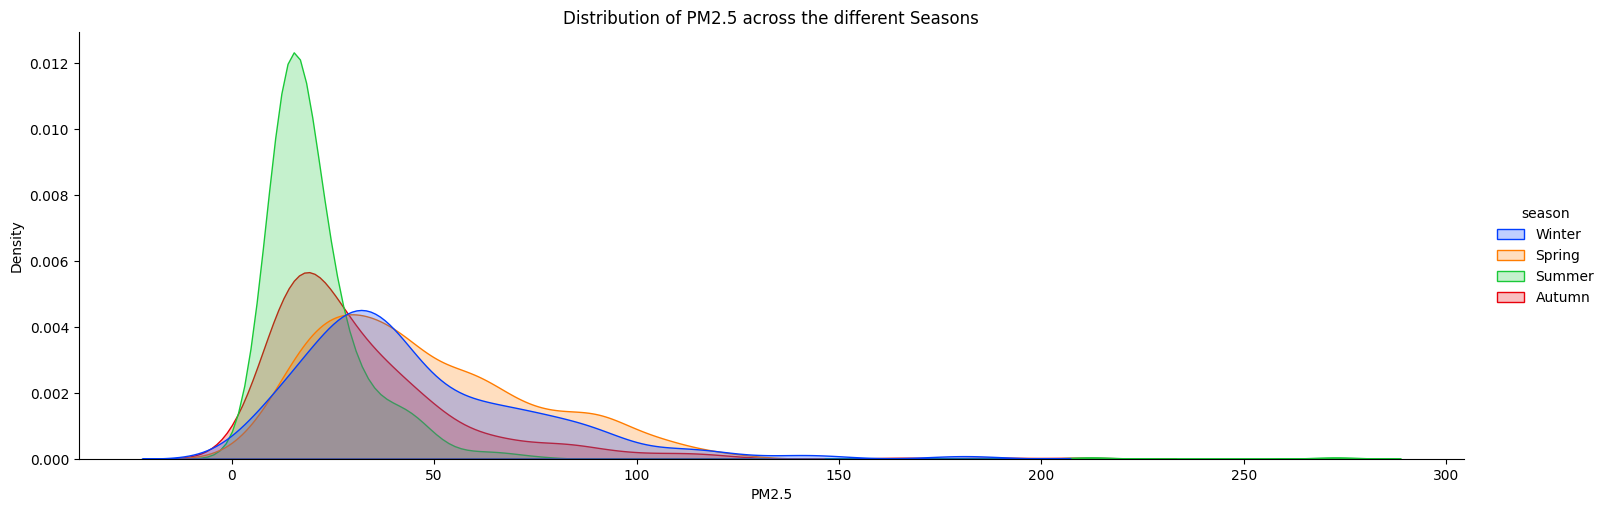

In [64]:
x = [0, 50, 100, 150, 200, 250, 300]
plt.figure(figsize = (15, 7))
sns.displot(data = df, x = 'pm2_5', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution of PM2.5 across the different Seasons')
plt.xlabel('PM2.5')
plt.show()

Observation: The PM2.5 distribution skews right, with concentrations primarily between 50 and 120 in Spring and Winter, Spring showing the highest density. In contrast, Summer and Autumn predominantly fall within lower PM2.5 levels (mainly below 50), with Summer exhibiting the lowest densities overall, and Autumn slightly below Spring and Winter.

### Overtime Diagram (from 2020-2024)

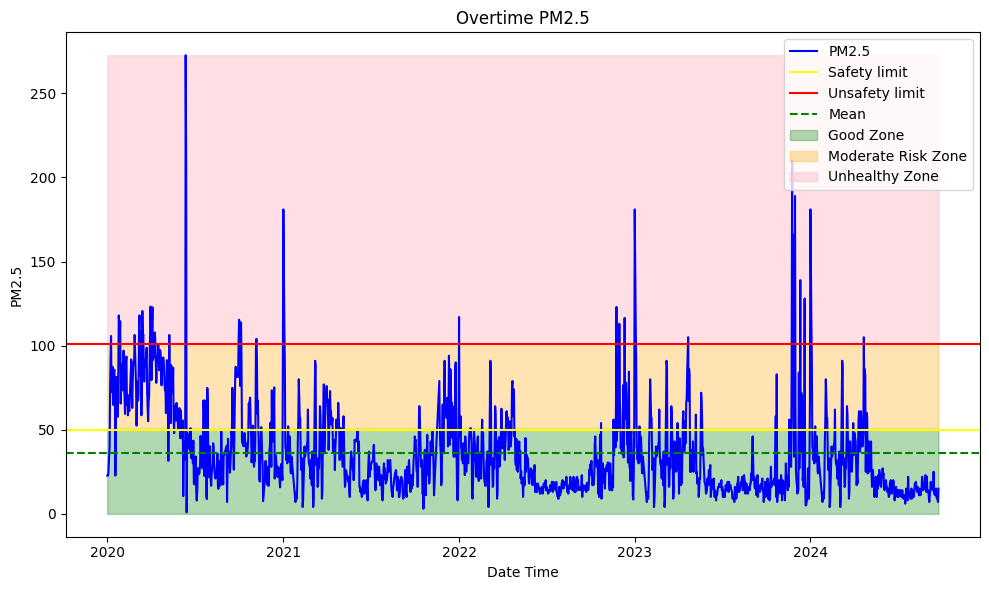

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["pm2_5"], label="PM2.5", color="b")
plt.xlabel("Date Time")
plt.ylabel("PM2.5")
plt.title("Overtime PM2.5")
plt.axhline(y=50, color="yellow", label="Safety limit", linestyle="-")
plt.axhline(y=101, color="red", label="Unsafety limit", linestyle="-")
plt.axhline(y=mean, color="green", label="Mean", linestyle="--")
plt.fill_between(df["date_time"], y1=0, y2=50, color='green', alpha=0.3, label='Good Zone')
plt.fill_between(df["date_time"], y1=51, y2=100, color='orange', alpha=0.3, label='Moderate Risk Zone')
plt.fill_between(df["date_time"], y1=101, y2=df["pm2_5"].max(), color='pink', alpha=0.5, label='Unhealthy Zone')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

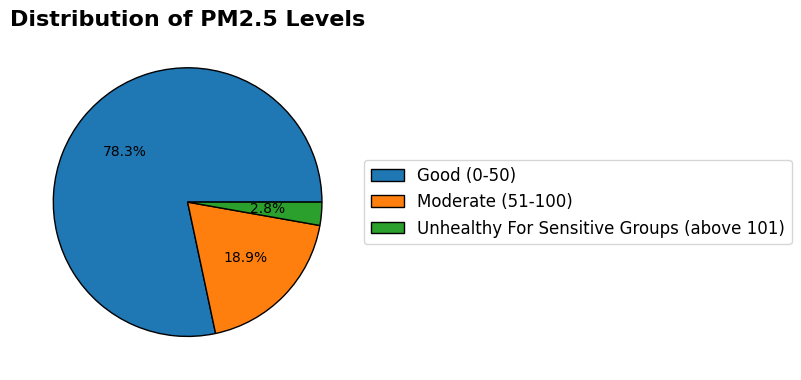

In [ ]:
good = len(df.loc[df["pm2_5"] <= 50])
moderate = len(df.loc[(df["pm2_5"] >= 51) & (df["pm2_5"] <= 100)])
sensitive = len(df.loc[(df["pm2_5"] >= 101)]) 
interval = [good, moderate, sensitive]
labels = ["Good (0-50)", "Moderate (51-100)", "Unhealthy For Sensitive Groups (above 101)"]

plt.figure(figsize=(8, 8))
explode = [0, 0, 0]
plt.pie(interval, wedgeprops={"edgecolor": "black", "linewidth": 1}, autopct='%1.1f%%', explode=explode)

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.title("Distribution of PM2.5 Levels", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


Observation: The PM2.5 graph from 2020 to 2024 reveals notable fluctuations in PM2.5 levels over time, with the safe limit occasionally surpassed during specific periods. Overall, Da Nang's PM2.5 levels predominantly fall within the good range, comprising 78.3%, while 20% are classified as moderate, and only about 3% exceed the unhealthy threshold (above 101).

### Average PM2.5 Per Year

year
2020    57.347085
2021    34.854795
2022    30.382192
2023    29.813699
2024    26.852060
Name: pm2_5, dtype: float64
1070


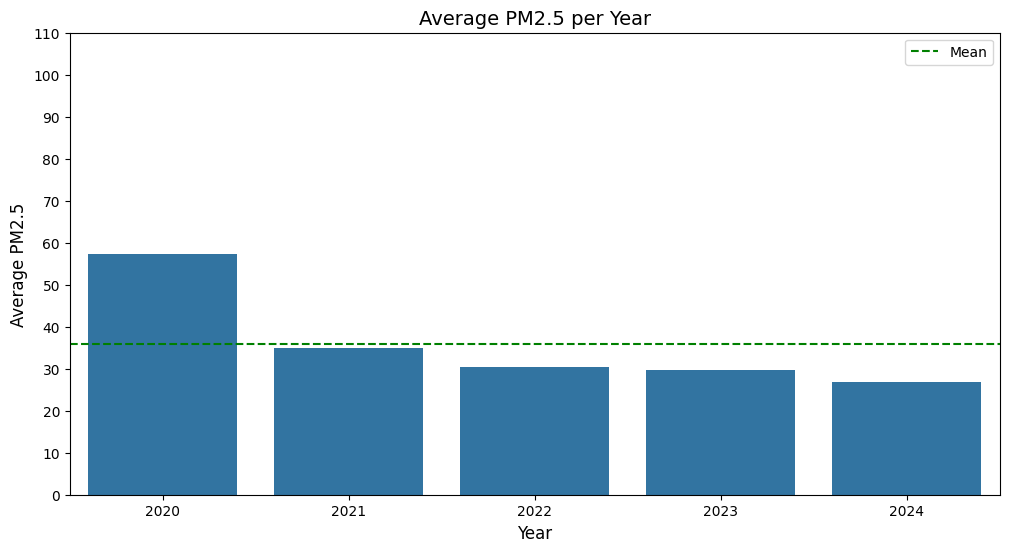

In [96]:
year = df.groupby('year')['pm2_5'].mean().sort_index()
print(year)

y = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100, 110]
plt.figure(figsize= [12, 6])
sns.barplot(x = year.index, y = year)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per Year', fontsize = 14)
plt.yticks(y)
date_high=len(df[df['pm2_5']<36])
print(date_high)
plt.axhline(36, ls= '--', color= 'green',label='Mean')
plt.legend()
plt.show()

Observation: From the chart, we can see that the PM2.5 level in 2020 was significant high, while in the following years it remained below the average threshold, showing a slight downward trend over time.

### Average PM2.5 Per Month Across All Years

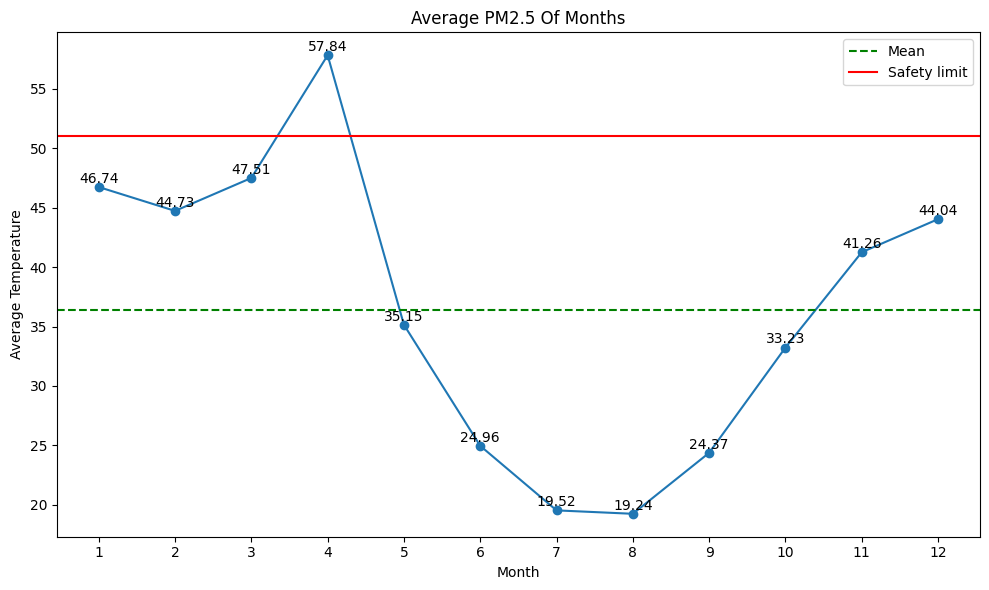

In [ ]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["pm2_5"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average PM2.5 Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["pm2_5"].mean(), color="green", label="Mean", linestyle="--")
plt.axhline(51, ls= '-', color= 'Red',label='Safety limit')
plt.legend()
plt.tight_layout()
plt.show()

Observation: It is observed that the PM2.5 levels are higher at the start of the year and towards the end of the year, with a significant change observed in April.

### Average PM2.5 Per Season

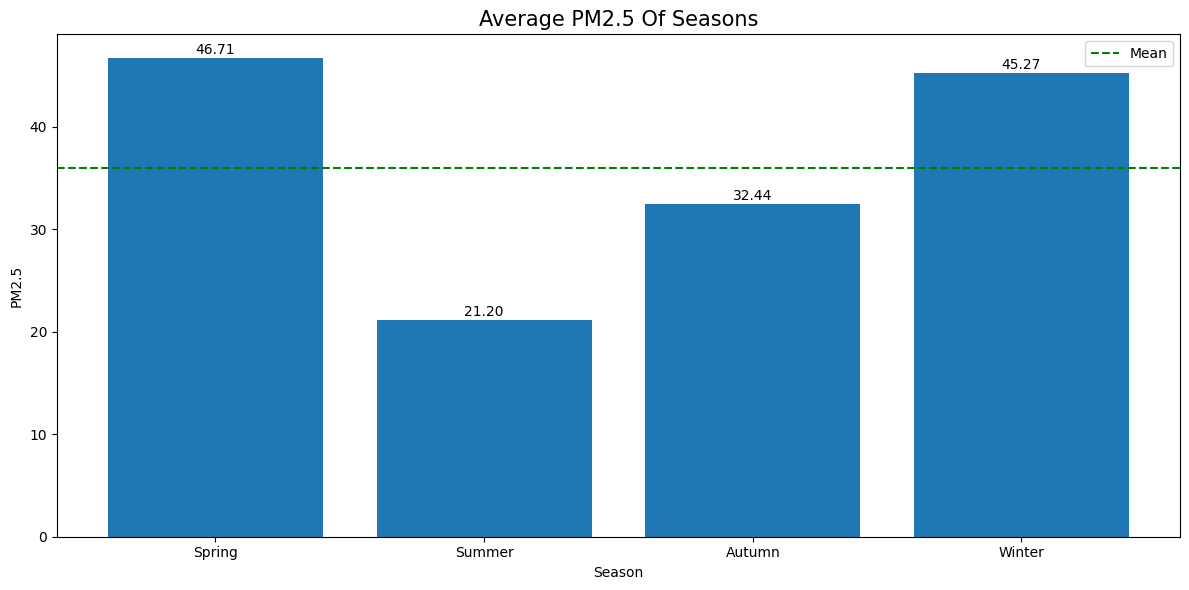

In [111]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["pm2_5"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average PM2.5 Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("PM2.5", size=10)
plt.axhline(36, ls= '--', color= 'green', label='Mean')
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

Observation: The charts above indicate that PM2.5 levels are highest on average during the Winter (December to February) and Spring (March to May) seasons, with average concentrations of 45.27 and 46.71, respectively. In contrast, PM2.5 levels in Summer and Autumn are considerably lower (21.20 and 32.44 respectively), with Summer recording the lowest levels overall.

### Correlation between Wind and PM2.5

### Wind Speed Average per month

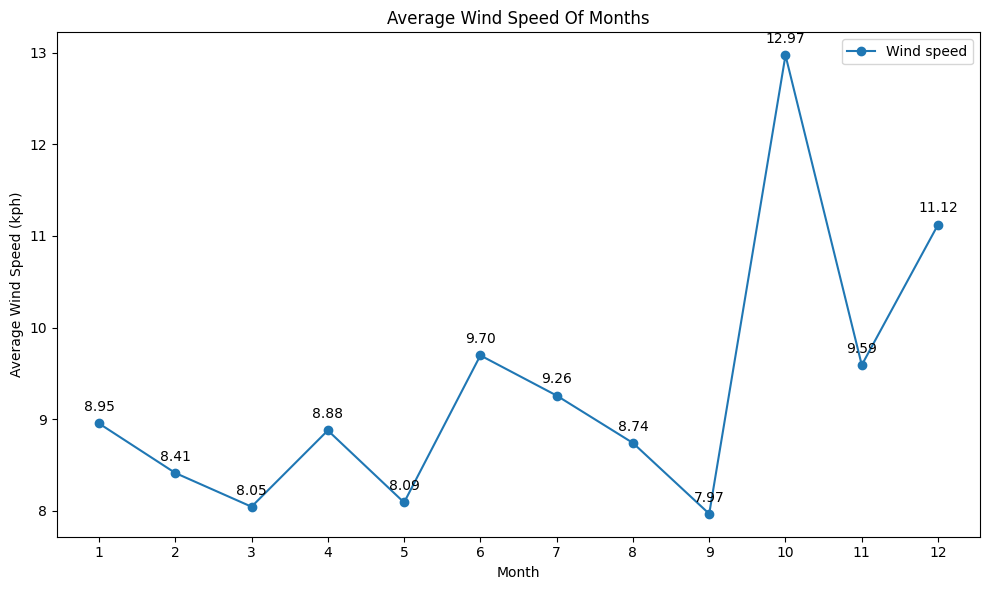

In [128]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["wind_kph"].mean())
plt.plot(idx, data, marker="o", label='Wind speed')
plt.title("Average Wind Speed Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Wind Speed (kph)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Wind Speed Average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


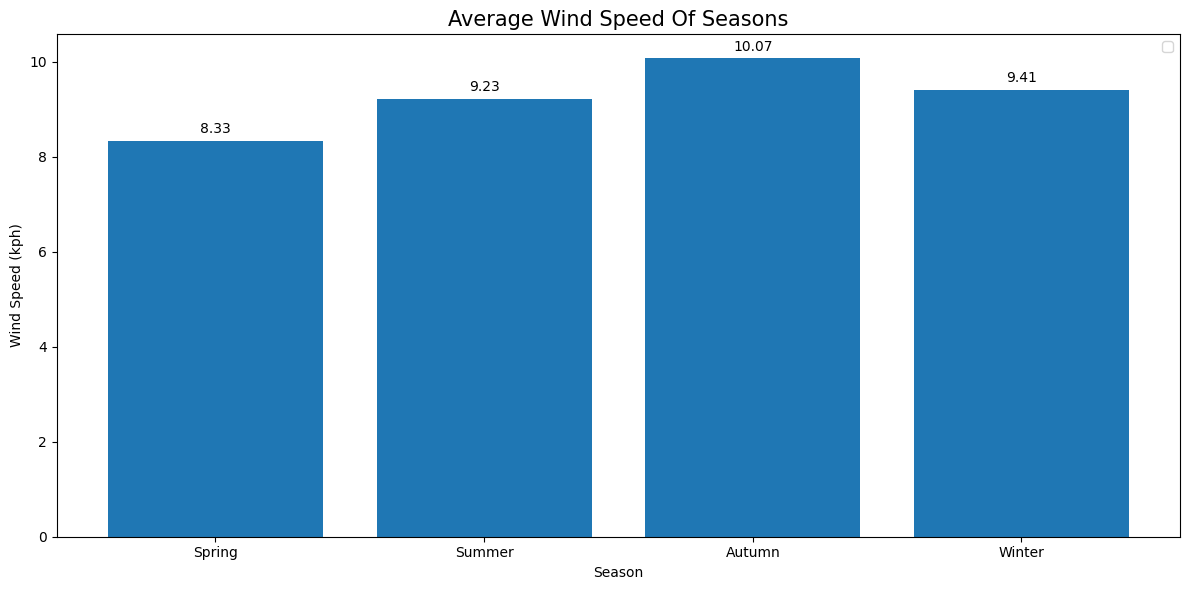

In [131]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["wind_kph"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Wind Speed Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Wind Speed (kph)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

Observation: Analyzing the wind speed both monthly and seasonally reveals that wind speed peaks during the Autumn season, followed closely by the Winter season. In contrast, the Spring season experiences the lowest wind speeds overall.

### Correlation and Scatterplot

Correlation Between PM2.5 And Wind: -0.013149965148192772


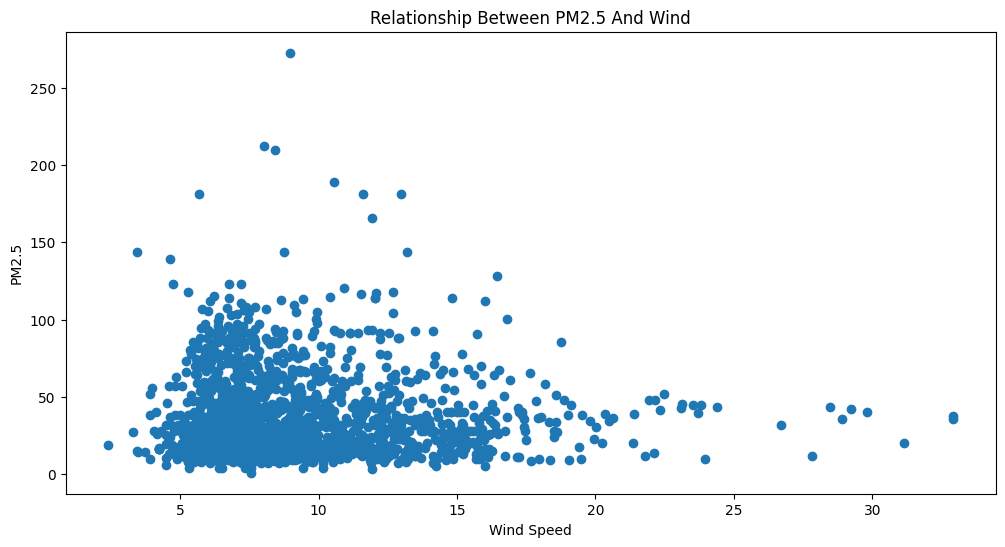

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df["wind_kph"], df["pm2_5"])
plt.xlabel("Wind Speed (kph)")
plt.ylabel("PM2.5")
plt.title("Relationship Between PM2.5 And Wind")
corr = df["pm2_5"].corr(df["wind_kph"], method="pearson")
print(f"Correlation Between PM2.5 And Wind: {corr:}")
plt.show()

Observation: The visual indicates a correlation coefficient of -0.01, suggesting a negligible correlation and no significant relationship between PM2.5 levels and wind speed. However, closer examination on the scatterplot diagram reveals that higher PM2.5 levels occur at low wind speeds, while extreme PM2.5 values are absent at higher wind speeds.

### Correlation between Temperature and PM2.5

### Temperature Average per month

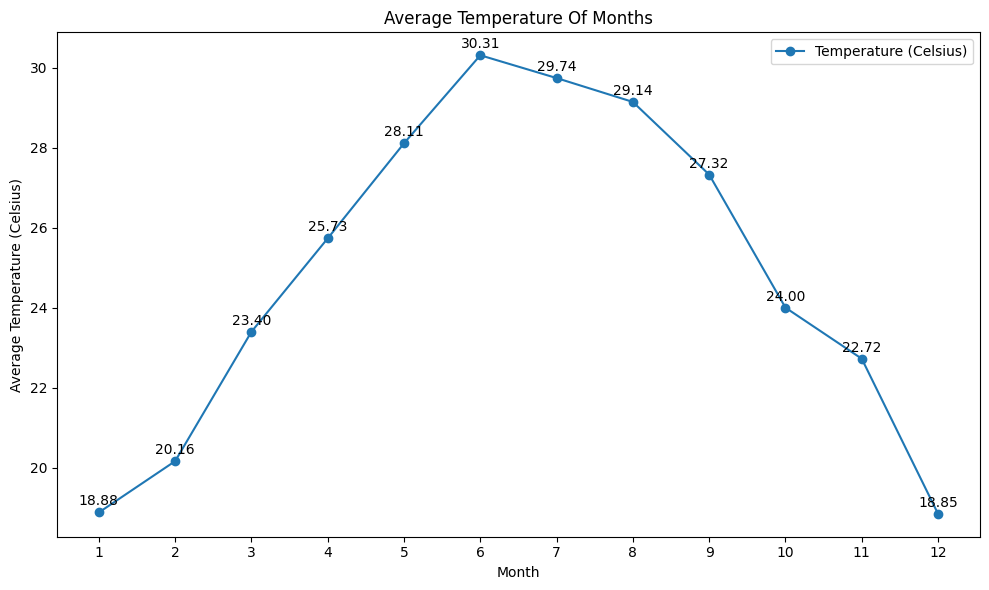

In [134]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["temp_c"].mean())
plt.plot(idx, data, marker="o", label='Temperature (Celsius)')
plt.title("Average Temperature Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Temperature (Celsius)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Temperature Average

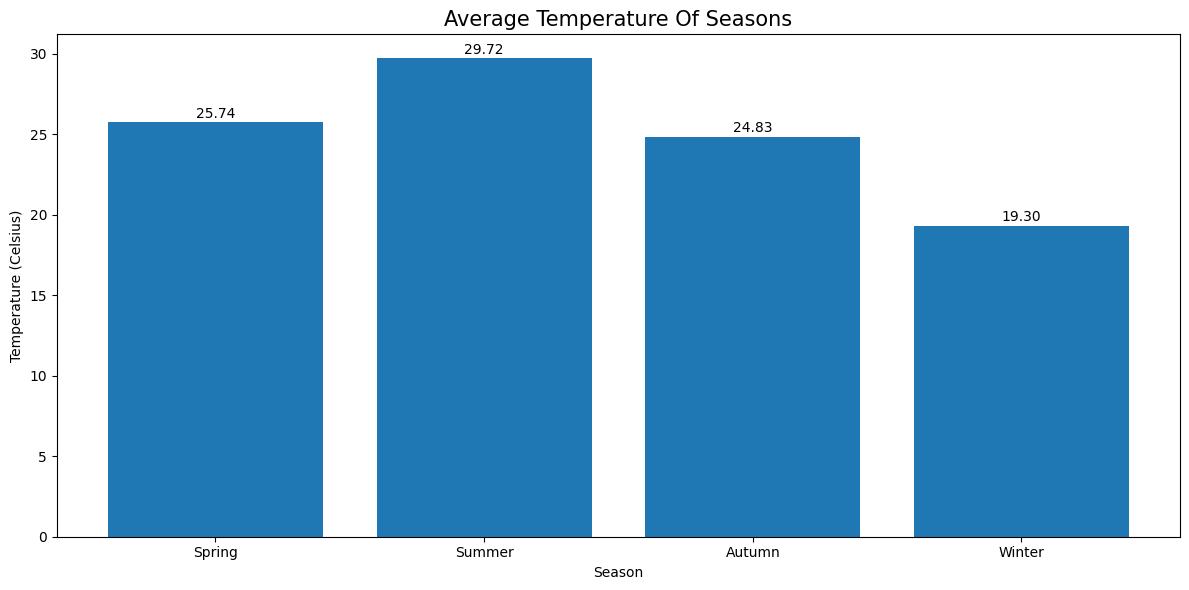

In [135]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["temp_c"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Temperature Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Temperature (Celsius)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The chart above indicates that average temperatures are lowest in winter, highest in summer, and moderate in autumn and spring.

### Correlation and Scatterplot

Correlation Between PM2.5 And Temp: -0.22184623545606336


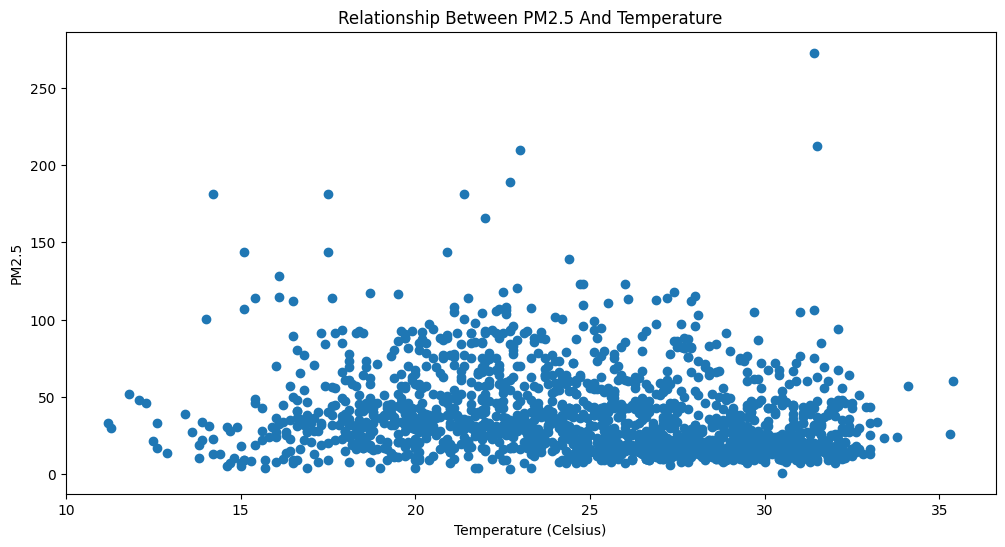

In [137]:
plt.figure(figsize=(12, 6))
plt.scatter(df["temp_c"], df["pm2_5"])
plt.xlabel("Temperature (Celsius)")
plt.ylabel("PM2.5")
plt.title("Relationship Between PM2.5 And Temperature")
corr = df["pm2_5"].corr(df["temp_c"], method="pearson")
print(f"Correlation Between PM2.5 And Temp: {corr:}")
plt.show()

Observation: The Relatioship between Temperature and the PM2.5 Level is close to zero which means there is no correlation. On trying to observe patterns, we cannot seem to see a clear pattern in the scatter diagram.

### Correlation between Humidity and PM2.5

### Humidity Average per month

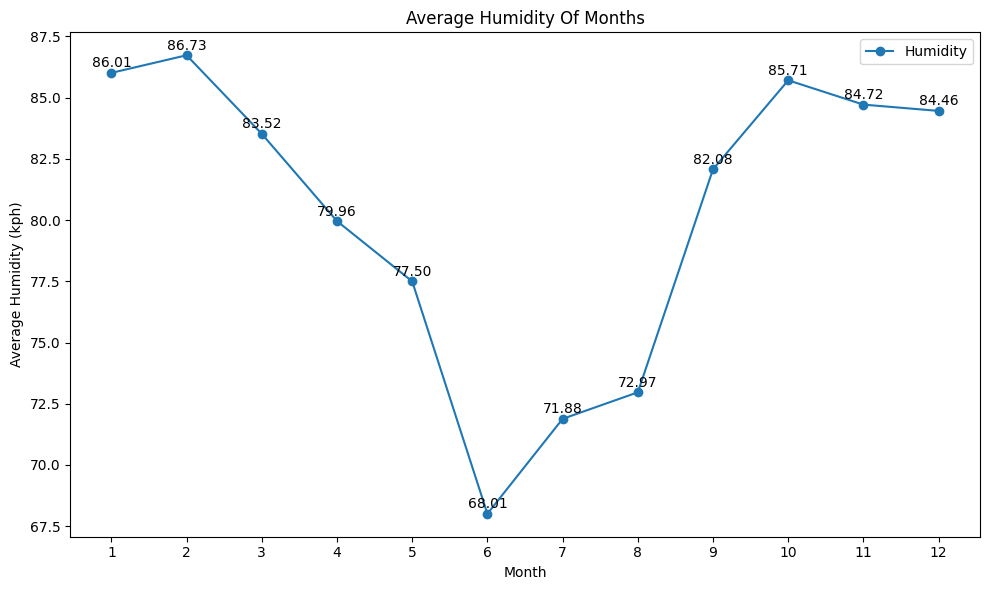

In [ ]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["humidity"].mean())
plt.plot(idx, data, marker="o", label='Humidity')
plt.title("Average Humidity Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Humidity")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Humidity Average

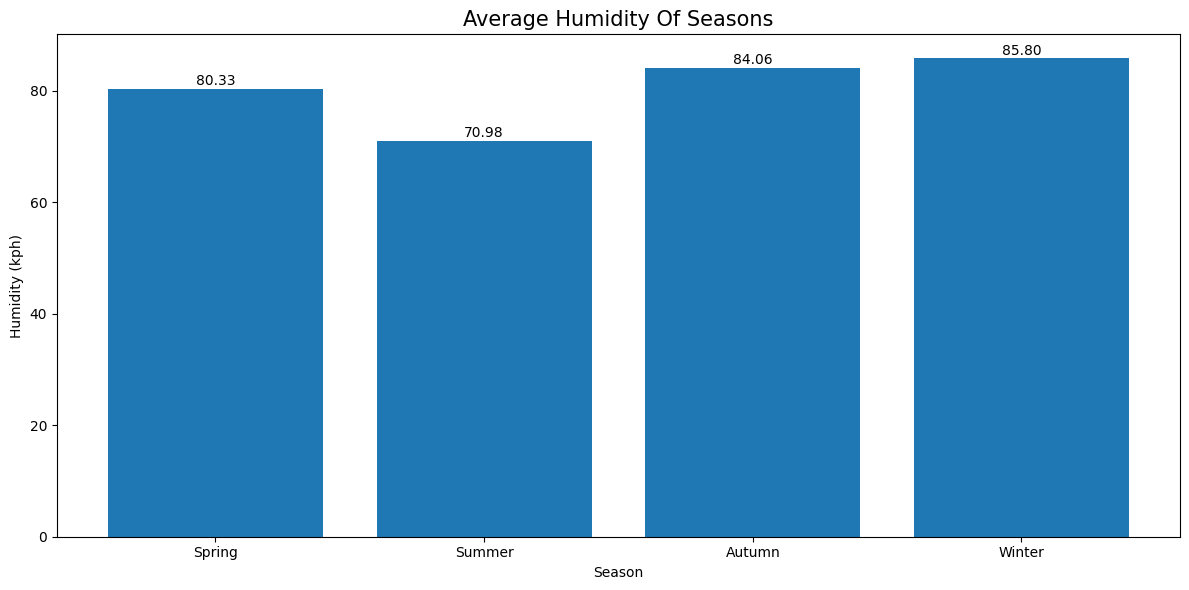

In [ ]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["humidity"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Humidity Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Humidity", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The analysis reveals that humidity levels are at their lowest during the summer months, while they peak in spring, autumn, and winter.

### Correlation and Scatterplot

Correlation Between PM2.5 And Humidity: 0.1737414158819616


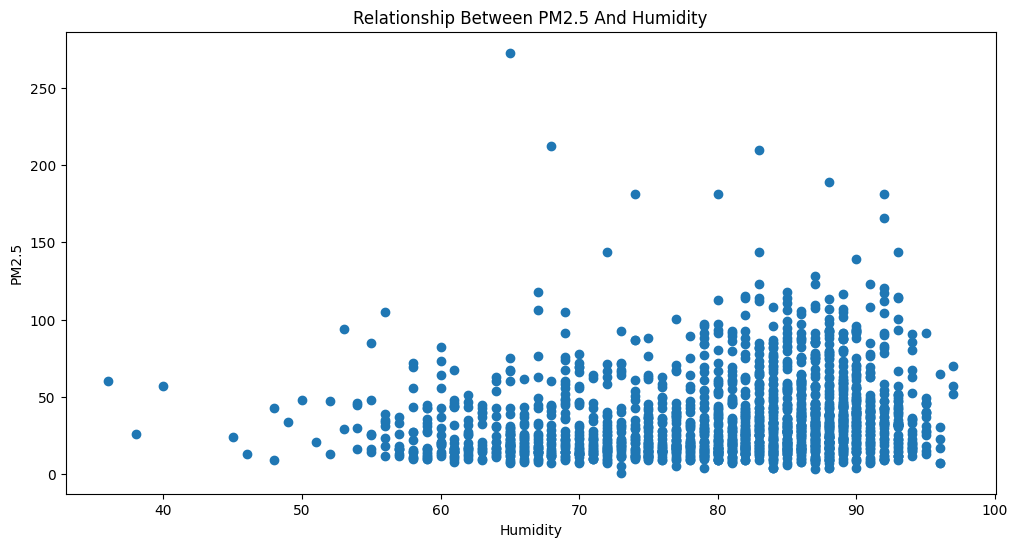

In [142]:
plt.figure(figsize=(12, 6))
plt.scatter(df["humidity"], df["pm2_5"])
plt.xlabel("Humidity")
plt.ylabel("PM2.5")
plt.title("Relationship Between PM2.5 And Humidity")
corr = df["pm2_5"].corr(df["humidity"], method="pearson")
print(f"Correlation Between PM2.5 And Humidity: {corr:}")
plt.show()

Observation: From the chart, we see that the correlation between PM2.5 and humidity is very low (0.17), suggesting little to no linear relationship. However, a closer look reveals that at higher humidity levels, PM2.5 concentrations tend to rise, hinting that humidity may have a certain influence on PM2.5 levels.

### Correlation between Precipitation and PM2.5

### Precipitation Average per month

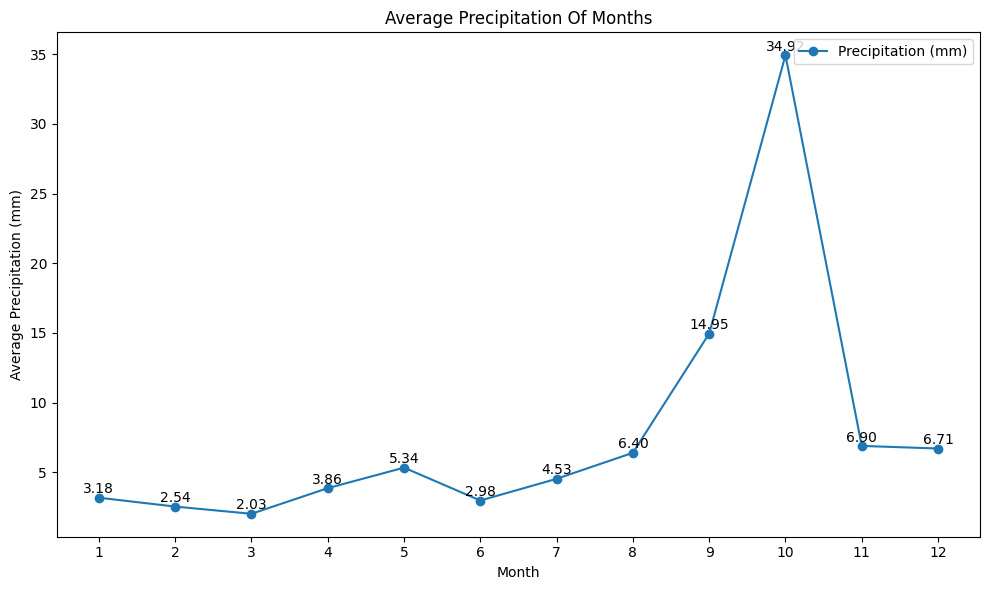

In [147]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["totalprecip_mm"].mean())
plt.plot(idx, data, marker="o", label='Precipitation (mm)')
plt.title("Average Precipitation Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Precipitation Average

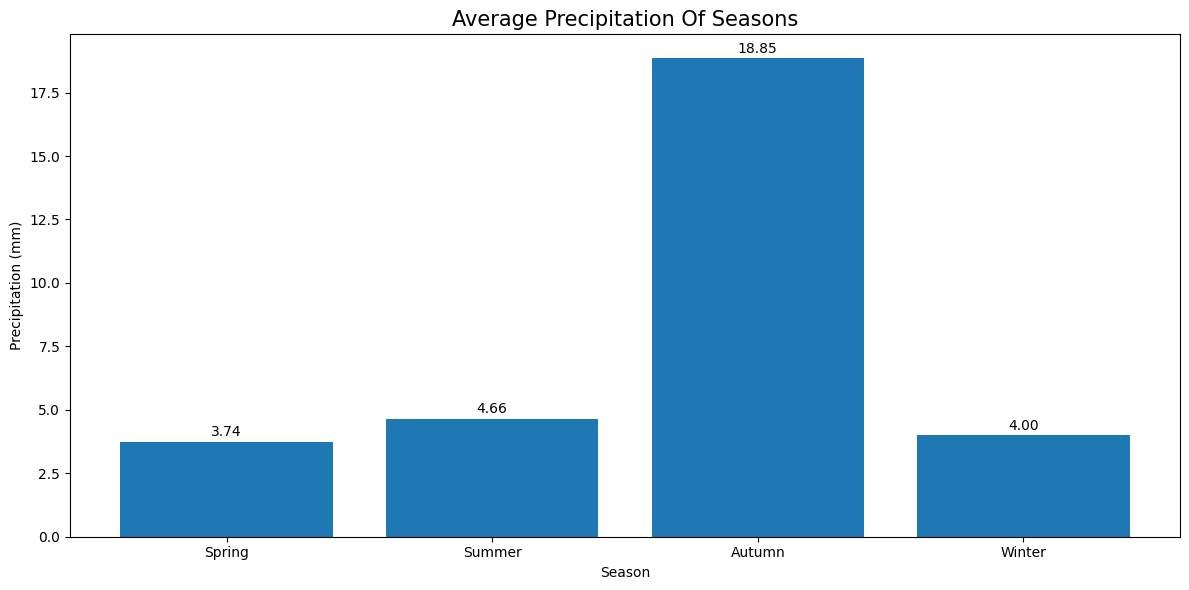

In [148]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["totalprecip_mm"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Precipitation Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Precipitation (mm)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The amount of rainfall (Precipitation Level) is observed highest in the Autumn season

### Correlation and Scatterplot

Correlation Between PM2.5 And Precipitation: -0.04130818962918841


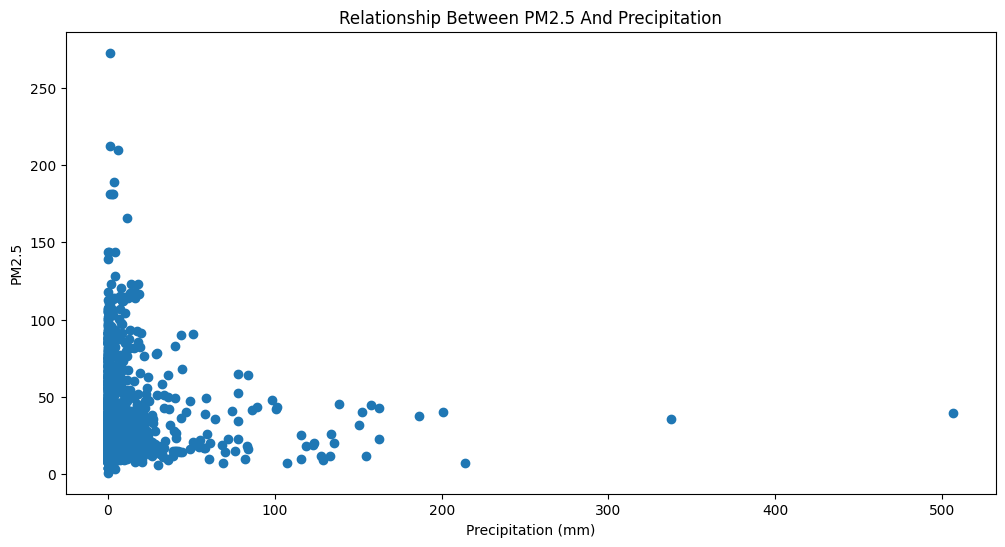

In [150]:
plt.figure(figsize=(12, 6))
plt.scatter(df["totalprecip_mm"], df["pm2_5"])
plt.xlabel("Precipitation (mm)")
plt.ylabel("PM2.5")
plt.title("Relationship Between PM2.5 And Precipitation")
corr = df["pm2_5"].corr(df["totalprecip_mm"], method="pearson")
print(f"Correlation Between PM2.5 And Precipitation: {corr:}")
plt.show()

Observation: The correlation between number of hours of precipitation and PM2.5 is almost 0, this means that there is no linear relationship between the two variables. On looking for patterns, It is observed that for Low amount of precipitation (below 10 mm), There are observed to be high PM2.5 level. It is safe to say that the lower the amount of rainfall, the higher the PM2.5 level

# CONCLUSION:
### PM2.5
-Seasonal Variation: PM2.5 levels tend to peak at the beginning and end of each year, with a noticeable increase in April and lower levels during mid-year.

-Air Quality Range: Most PM2.5 concentrations fall within the “Good” category, with an average AQI of 36.

-Long-Term Trend: There is a gradual decrease in PM2.5 levels over recent years, indicating an overall improvement in air quality.

### Weather:
-Temperatures show mild seasonal fluctuations. Spring and autumn remain cool at around 25°C, while summer peaks at 30.31°C in June. Winter is coldest, with temperatures averaging 18°C in December and January.

-Wind speeds remain stable from January through September but increase significantly starting in October, becoming more variable by year-end.

-Humidity is low in summer, reaching its lowest in June at 68%, and rises significantly in autumn and winter, averaging over 84%.

-Rainfall is concentrated at the end of the year, with October accounting for over 50% of the annual total of 2886.5mm.

### Impact of Weather on PM2.5 Levels:
-Temperature: While the correlation between temperature and PM2.5 is near zero, indicating no clear linear relationship, observations suggest that PM2.5 levels vary without a strong pattern across temperatures.

-Wind Speed: The correlation with PM2.5 is also negligible, but patterns show that higher PM2.5 levels are generally associated with low wind speeds. Conversely, extreme PM2.5 values are rarely seen at higher wind speeds, possibly due to greater pollutant dispersion.

-Humidity: A low correlation (0.17) suggests minimal linear impact, but higher humidity levels tend to accompany higher PM2.5 concentrations, hinting that humidity might contribute to particle accumulation.

Precipitation: The relationship with PM2.5 is near zero, indicating no direct correlation. However, patterns reveal that low precipitation (below 10 mm) often aligns with elevated PM2.5, suggesting that limited rainfall may allow for higher pollutant concentrations.

## Overall: While no weather factor exhibits a strong correlation with PM2.5 levels, patterns suggest that low wind speeds, high humidity, and minimal rainfall may contribute to higher PM2.5 accumulation, impacting air quality under certain conditions.

